# Perceptron

The perceptron algorithm was invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt, funded by the United States Office of Naval Research.

![](../assets/perceptron.png)

## Mathematical formula of the perceptron

$\large \hat{y} = 1, \text{if} \sum_{i=0}^{n} w_i x_i >= b $

$\large \hat{y} = 0, \text{otherwise}$

## Import Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

np.random.seed(0)

## Load Data

In [2]:
dataset = load_breast_cancer()
dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe['target'] = dataset.target

In [3]:
print(dataframe.shape)

(569, 31)


## Explore Data

In [4]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


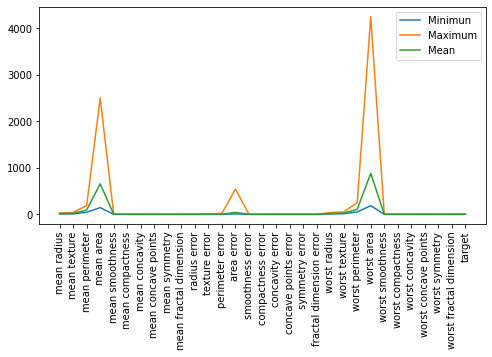

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(dataframe.describe().loc['min'].T, label='Minimun'),
plt.plot(dataframe.describe().loc['max'].T, label='Maximum'),
plt.plot(dataframe.describe().loc['mean'].T, label='Mean')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [7]:
record_counts = dataframe['target'].value_counts()

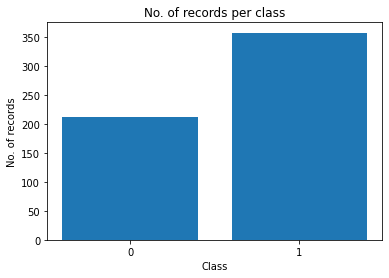

In [8]:
plt.bar(record_counts.keys(), record_counts)
plt.xticks(record_counts.keys())
plt.xlabel('Class')
plt.ylabel('No. of records')
plt.title('No. of records per class')
plt.show()

## Train-Test Split

In [9]:
X = dataframe.drop(columns=['target'])
Y = dataframe['target']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(512, 30) (512,) (57, 30) (57,)


In [11]:
# Printing the train and test Y samples to ensure both the train and test contain similar no of target data
print(Y.mean(), Y_train.mean(), Y_test.mean())

# As you can see the train and test contain similar samples and this happened by providing the 'stratify' during split.

0.6274165202108963 0.626953125 0.631578947368421


## Convert to NumPy Array

In [12]:
X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values

print(type(X_train), type(X_test), type(Y_train), type(Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Min-Max Scaler

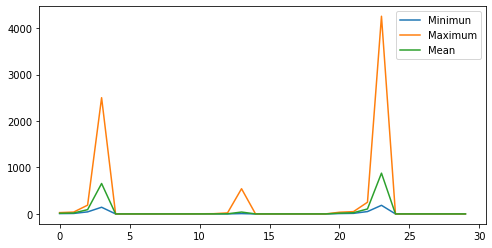

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(X_train.min(axis=0), label='Minimun')
plt.plot(X_train.max(axis=0), label='Maximum')
plt.plot(X_train.mean(axis=0), label='Mean')
plt.legend()
plt.show()

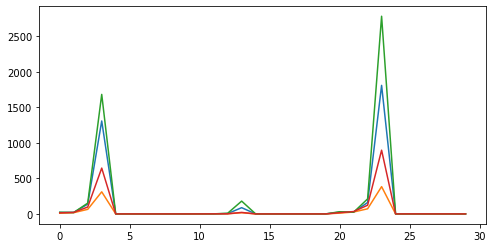

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(X_train[0])
plt.plot(X_train[1])
plt.plot(X_train[2])
plt.plot(X_train[3])
plt.show()

In [15]:
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

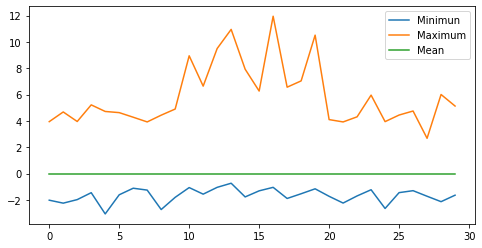

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(X_train.min(axis=0), label='Minimun')
plt.plot(X_train.max(axis=0), label='Maximum')
plt.plot(X_train.mean(axis=0), label='Mean')
plt.legend()
plt.show()

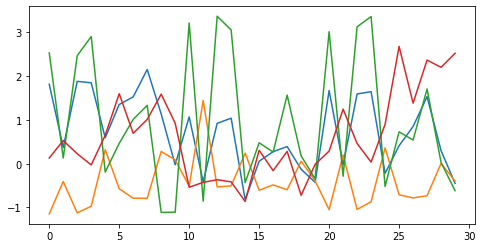

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(X_train[0])
plt.plot(X_train[1])
plt.plot(X_train[2])
plt.plot(X_train[3])
plt.show()

## Model Class

In [18]:
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None
        self.accuracy_map = {}
        self.best_accuracy = 0
        self.weight_matrix = []
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            Y.append(self.model(x))
        return np.array(Y)

    def fit(self, X, Y, epochs=1, learning_rate=1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        self._epochs = epochs

        for i in tqdm(range(epochs), total=epochs, unit='epoch', desc="Epoch:", ncols=80):
            for x, y in zip(X, Y):
                y_pred = self.model(x)

                if y == 1 and y_pred == 0:
                    self.w = self.w + learning_rate * x
                    self.b = self.b - learning_rate * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - learning_rate * x
                    self.b = self.b + learning_rate * 1

            self.weight_matrix.append(self.w)
            self.accuracy_map[i] = accuracy_score(self.predict(X), Y)
            if self.accuracy_map[i] > self.best_accuracy:
                self.best_accuracy = self.accuracy_map[i]
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb
        self.weight_matrix = np.array(self.weight_matrix)

        plt.plot(np.array(list(self.accuracy_map.values())).astype(float))
        plt.plot()

## Train Model

Epoch:: 100%|███████████████████████████| 1000/1000 [00:05<00:00, 199.04epoch/s]


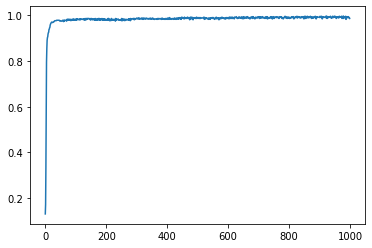

In [19]:
model = Perceptron()
model.fit(X_train, Y_train, epochs=1000, learning_rate=0.001)

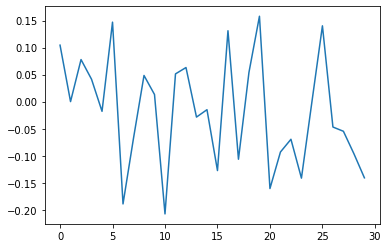

In [20]:
plt.plot(model.w)
plt.show()

In [21]:
print(accuracy_score(model.predict(X_train), Y_train))

0.99609375


## Model Evaluation

In [22]:
print(accuracy_score(model.predict(X_test), Y_test))

0.9824561403508771
